In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# RETVec
from retvec.tf import RETVecTokenizer

# HuggingFace Datasets
from datasets import load_dataset

# silence TF INFO messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

# model save path
save_path = '../models/retvec_model.h5'


## Download the Dataset

In [2]:
# Download the Dataset
dataset = load_dataset('go_emotions')
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [23]:
# Check how the train texts look like
dataset['train']['text']

["My favourite food is anything I didn't have to cook myself.",
 'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead',
 'WHY THE FUCK IS BAYLESS ISOING',
 'To make her feel threatened',
 'Dirty Southern Wankers',
 "OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass Broncos fans circa December 2015.",
 'Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝',
 'We need more boards and to create a bit more space for [NAME]. Then we’ll be good.',
 'Damn youtube and outrage drama is super lucrative for reddit',
 'It might be linked to the trust factor of your friend.',
 'Demographics? I don’t know anybody under 35 who has cable tv.',
 "Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol ",
 'Hello everyone. Im from Toronto as well. Can call and visit in personal if needed.',
 "R/s

In [24]:
# Check how the train labels look like
dataset['train']['labels']

[[27],
 [27],
 [2],
 [14],
 [3],
 [26],
 [15],
 [8, 20],
 [0],
 [27],
 [6],
 [1, 4],
 [27],
 [5],
 [3],
 [3, 12],
 [15],
 [2],
 [27],
 [6, 22],
 [6, 9, 27],
 [12],
 [27],
 [27],
 [27],
 [2],
 [27],
 [16, 25],
 [15],
 [27],
 [2],
 [6],
 [27],
 [2, 7],
 [6],
 [17],
 [27],
 [0],
 [25],
 [27],
 [0, 15],
 [15, 18],
 [16, 27],
 [27],
 [7, 13],
 [10],
 [20],
 [27],
 [27],
 [27],
 [27],
 [27],
 [4],
 [27],
 [13, 15],
 [10],
 [27],
 [27],
 [27],
 [15],
 [0, 1],
 [12],
 [27],
 [13],
 [27],
 [0, 15],
 [27],
 [1],
 [27],
 [0],
 [27],
 [0, 5],
 [3],
 [27],
 [27],
 [27],
 [0, 13, 15],
 [0],
 [27],
 [1],
 [13],
 [4],
 [25],
 [4],
 [27],
 [25],
 [0, 15],
 [9],
 [4, 22],
 [27],
 [4],
 [27],
 [24],
 [18],
 [4],
 [27],
 [7],
 [27],
 [7],
 [27],
 [0],
 [3],
 [10],
 [27],
 [27],
 [5],
 [27],
 [6, 7],
 [27],
 [15],
 [27],
 [0],
 [22],
 [27],
 [17],
 [27],
 [2],
 [2],
 [27],
 [27],
 [9, 27],
 [4, 5],
 [27],
 [3],
 [2, 3],
 [26],
 [7],
 [2],
 [27],
 [0, 8, 15, 17],
 [15],
 [27],
 [11],
 [27],
 [27],
 [9],
 [7

## Get the Emotion Classes

In [3]:
classes = dataset['train'].features['labels'].feature.names
num_classes = len(classes)
print(f"Number of Classes: {num_classes}")
print(classes)

Number of Classes: 28
['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


## Preprocessing the Data with One-Hot Encoding and Conversion to Tensors

In [26]:
# Prepare the data
x_train = tf.constant(dataset['train']['text'], dtype=tf.string)

# the one-hot requires a little more due to the multi-class nature of the dataset.
y_train = np.zeros((len(x_train), num_classes))
for idx, label in enumerate(dataset['train']['labels']):
    for lbl in label:
        y_train[idx][lbl] = 1

# test data
x_test = tf.constant(dataset['test']['text'], dtype=tf.string)
y_test = np.zeros((len(x_test), num_classes))
for idx, label in enumerate(dataset['test']['labels']):
    for lbl in label:
        y_test[idx][lbl] = 1

In [27]:
print("x_train contents:")
print(x_train)
print(type(x_train))
print("\ny_train contents:")
print(y_train)
print(type(y_train))

x_train contents:
tf.Tensor(
[b"My favourite food is anything I didn't have to cook myself."
 b'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead'
 b'WHY THE FUCK IS BAYLESS ISOING' ...
 b'What are you talking about? Anything bad that happened was [NAME] fault - only good things were [NAME] doing!'
 b'More like a baptism, with sexy results!' b'Enjoy the ride!'], shape=(43410,), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>

y_train contents:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


## Creating the Keras Model
A key benefit of using RETVec is that inputs to RETVec and the text model are raw strings with no pre-processing neccessary, which greatly simplifies the training and inference process, especially for on-device models.

Notes:

- Using strings directly as input requires to use a shape of (1,) and specify the type tf.string
- We are using RETVecTokenizer() in its default configuration which is to truncate at 128 words and use a small pre-trained word embedding model to embed the words. You can experiment with shorter or longer length by changing the sequence_length parameter. The word embedding model offers significant improvements in adversarial and typo robustness. To use the RETVec character tokenizer only, set model=None.
- To use native TF ops only for TF Lite compatibility, set use_tf_lite_compatible_ops=True. see the TF Lite notebook for more details on how to convert a RETVec-based model to a TF Lite model which can run on-device.

In [44]:
# Inputs: Using strings directly requires to put a shape of (1,) and dtype tf.string
inputs = layers.Input(shape=(1, ), name="token", dtype=tf.string)

# Layers: add RETVec tokenizer layer with default settings
x = RETVecTokenizer(model='retvec-v1')(inputs)
# standard two layer LSTM
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Outputs: Dense layer with Sigmoid 
# Sigmoid is a better activation function for binary-class problems
# In our case, the data using one-hot encoding
outputs = layers.Dense(num_classes, activation='sigmoid')(x)

# Finish setting up the model
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token (InputLayer)          [(None, 1)]               0         
                                                                 
 ret_vec_tokenizer_3 (RETVe  (None, 128, 256)          230144    
 cTokenizer)                                                     
                                                                 
 bidirectional_6 (Bidirecti  (None, 128, 128)          164352    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 28)                3612      
                                                           

In [45]:
# Compile and Train the Model
batch_size = 256
epochs = 25
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(x_test, y_test))

Epoch 1/25
170/170 [==============================] - 360s 2s/step - loss: 0.1728 - acc: 0.2905 - val_loss: 0.1473 - val_acc: 0.2959
Epoch 2/25
170/170 [==============================] - 364s 2s/step - loss: 0.1472 - acc: 0.3019 - val_loss: 0.1425 - val_acc: 0.3228
Epoch 3/25
170/170 [==============================] - 338s 2s/step - loss: 0.1409 - acc: 0.3326 - val_loss: 0.1356 - val_acc: 0.3507
Epoch 4/25
170/170 [==============================] - 333s 2s/step - loss: 0.1355 - acc: 0.3554 - val_loss: 0.1302 - val_acc: 0.3788
Epoch 5/25
170/170 [==============================] - 362s 2s/step - loss: 0.1303 - acc: 0.3822 - val_loss: 0.1251 - val_acc: 0.4067
Epoch 6/25
170/170 [==============================] - 339s 2s/step - loss: 0.1252 - acc: 0.4127 - val_loss: 0.1205 - val_acc: 0.4258
Epoch 7/25
170/170 [==============================] - 336s 2s/step - loss: 0.1208 - acc: 0.4331 - val_loss: 0.1171 - val_acc: 0.4457
Epoch 8/25
170/170 [==============================] - 375s 2s/step - 

## Plot the Training Accuracy and Validation Accuracy

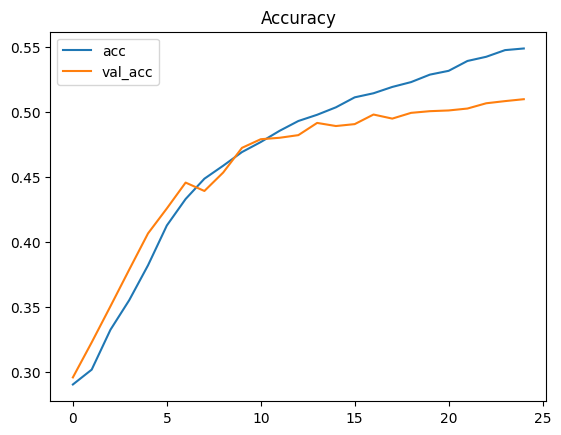

In [46]:
# Visualize the Training Curves
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title(f'Accuracy')
plt.show()

## Save the Model

In [6]:
# Saving the Model
model.save(save_path)

c:\Users\dariu\OneDrive\Desktop\data_science\transformers_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Model
#### To load the model, run everything <b>EXCEPT</b> for:
- Creating the Keras Model Section
- Plotting Section
- Saving the Model Section

In [7]:
model = tf.keras.models.load_model(save_path, compile=True)

In [37]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss: {loss * 100:.2f}%')
print(f'Accuracy: {accuracy * 100:.2f}%')

170/170 [==============================] - 25s 149ms/step - loss: 0.1015 - acc: 0.5099
Loss: 10.15%
Accuracy: 50.99%


In [8]:
# The model returns the array of probabilities for all 28 emotions
model(tf.constant(["I feel so bad"]))[0]

<tf.Tensor: shape=(28,), dtype=float32, numpy=
array([0.00539971, 0.02429354, 0.03250998, 0.05696547, 0.01343159,
       0.01403017, 0.00651526, 0.00355194, 0.00302174, 0.22685277,
       0.03873814, 0.04834437, 0.04497508, 0.00112165, 0.04263349,
       0.00115301, 0.00808723, 0.00762424, 0.00763967, 0.03408444,
       0.0033961 , 0.00181722, 0.02473719, 0.00136167, 0.06613524,
       0.7139388 , 0.00207247, 0.09072866], dtype=float32)>

: 

In [12]:
def predict_emotions(txt):
    predictions = model(tf.constant([txt]))[0]
    best_prediction_index = tf.argmax(predictions).numpy()
    predicted_emotion = classes[best_prediction_index]
    probability = round(tf.reduce_max(predictions).numpy() * 100, 1)
    print(f"Emotion: {predicted_emotion} ({probability})%")

In [38]:
txts = [
    "he is really good at what he is doing",
    "I am angry",
    "I find these very funny",
    "I enjoy having a good icecream.",
    "I don't like this. Take it away",
    "You shocked me!",
    "That was embarassing.",
    "I think that you are right",
    "The food tastes so disgusting",
    "I am very sorry for your loss",
    "I just realized that I should be working right now",
    "I think I really like you",
    "This place is creepy and scary",
    "I want to be a billionaire",
    "I just feel so annoyed"
]
for txt in txts:
    print(f"- - - - | {txt} | - - - -")
    predict_emotions(txt)

- - - - | he is really good at what he is doing | - - - -
Emotion: admiration (76.4)%
- - - - | I am angry | - - - -
Emotion: neutral (37.9)%
- - - - | I find these very funny | - - - -
Emotion: amusement (89.5)%
- - - - | I enjoy having a good icecream. | - - - -
Emotion: joy (80.9)%
- - - - | I don't like this. Take it away | - - - -
Emotion: disapproval (72.7)%
- - - - | You shocked me! | - - - -
Emotion: surprise (74.1)%
- - - - | That was embarassing. | - - - -
Emotion: sadness (20.6)%
- - - - | I think that you are right | - - - -
Emotion: approval (68.2)%
- - - - | The food tastes so disgusting | - - - -
Emotion: disgust (63.2)%
- - - - | I am very sorry for your loss | - - - -
Emotion: remorse (72.8)%
- - - - | I just realized that I should be working right now | - - - -
Emotion: realization (42.1)%
- - - - | I think I really like you | - - - -
Emotion: love (74.6)%
- - - - | This place is creepy and scary | - - - -
Emotion: fear (73.6)%
- - - - | I want to be a billionaire | -

In [126]:
# the model works even with typos, substitutions, and emojis!
txt = "I enjoy hving a g00d ic3cream!!! 🍦"
predict_emotions(txt)

Emotion: joy (86.1)%
